$$
p_r(r_k) = \frac{n_k}{MN}\\
s_k = T(r_k) = (L - 1) \sum\limits_{j=0}^{k} p_r(r_j)
$$

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [82]:
np.random.seed(1023)
image = np.random.randint(8, size=(64, 64))
image

array([[7, 3, 3, ..., 3, 1, 0],
       [4, 6, 0, ..., 3, 5, 7],
       [0, 3, 5, ..., 1, 2, 0],
       ...,
       [3, 0, 4, ..., 5, 7, 0],
       [6, 5, 6, ..., 0, 5, 5],
       [3, 3, 0, ..., 2, 5, 5]])

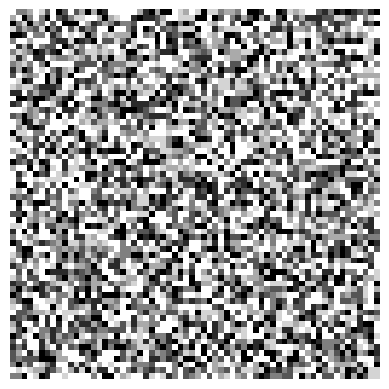

In [83]:
plt.imshow(image, plt.cm.get_cmap('gray', 7))
plt.axis("off")
plt.show()

In [84]:
def get_values(img) -> dict:
    unique, counts = np.unique(img, return_counts=True)
    return dict(zip(unique, counts))

In [85]:
values = get_values(image)
values

{0: 530, 1: 481, 2: 499, 3: 498, 4: 497, 5: 549, 6: 526, 7: 516}

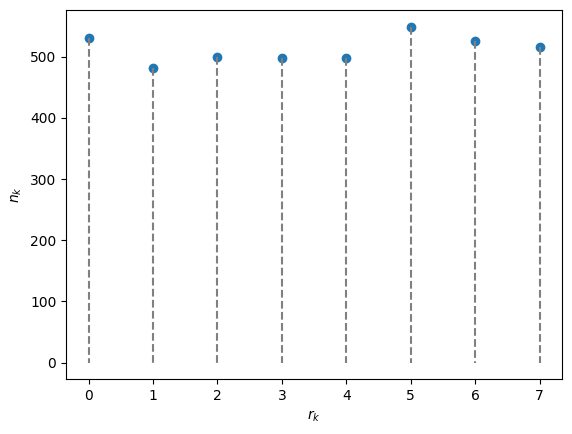

In [86]:
plt.scatter(range(8), values.values())
[plt.plot([i, i], [list(values.values())[i], 0], '--', color='gray') for i in range(8)]
plt.ylabel("$n_k$")
plt.xlabel("$r_k$")
plt.show()

In [87]:
p_r_values = {key:val/image.size for key, val in values.items()}
p_r_values

{0: 0.12939453125,
 1: 0.117431640625,
 2: 0.121826171875,
 3: 0.12158203125,
 4: 0.121337890625,
 5: 0.134033203125,
 6: 0.12841796875,
 7: 0.1259765625}

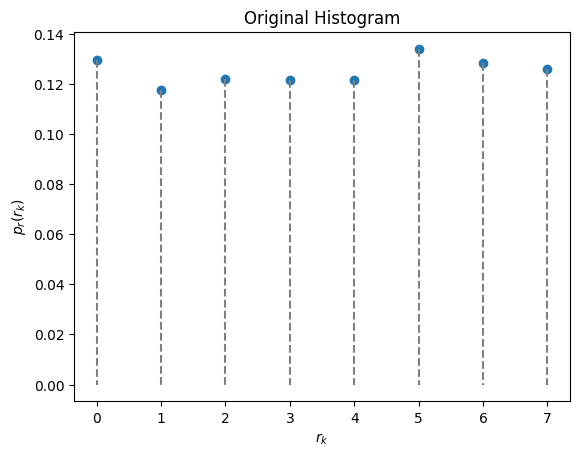

In [88]:
plt.scatter(range(8), p_r_values.values())
[plt.plot([i, i], [list(p_r_values.values())[i], 0], '--', color='gray') for i in range(8)]
plt.ylabel("$p_r(r_k)$")
plt.xlabel("$r_k$")
plt.title("Original Histogram")
plt.show()

In [89]:
# Histogram Equalization
v = []
for j in values.keys():
    s = 0
    for i in range(int(j) + 1):
        s += p_r_values.get(i)
    v.append(s * (len(values.keys()) - 1))
v

[0.90576171875,
 1.727783203125,
 2.58056640625,
 3.431640625,
 4.281005859375,
 5.21923828125,
 6.1181640625,
 7.0]

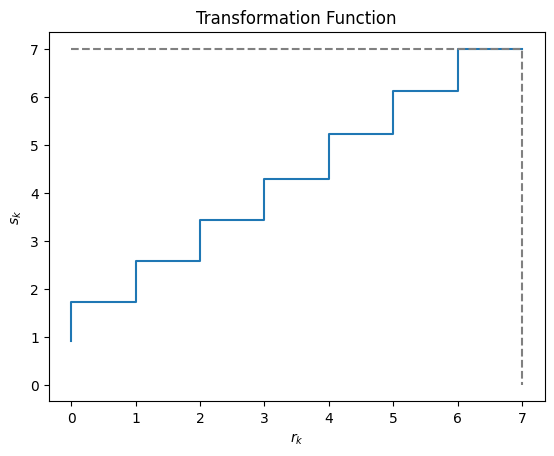

In [90]:
plt.step(range(8), v)
plt.ylabel("$s_k$")
plt.xlabel("$r_k$")
plt.title("Transformation Function")
plt.plot([0,7,7], [7,7,0], '--', color='gray')
plt.show()

In [91]:
v = [round(i) for i in v]
v = sorted(v)
v

[1, 2, 3, 3, 4, 5, 6, 7]

In [92]:
equalized_histogram = dict()
for i, j in zip(v, values.values()):
    equalized_histogram.setdefault(i, []).append(j)
equalized_histogram = {key:sum(val)/ image.size for key, val in equalized_histogram.items()}
equalized_histogram

{1: 0.12939453125,
 2: 0.117431640625,
 3: 0.243408203125,
 4: 0.121337890625,
 5: 0.134033203125,
 6: 0.12841796875,
 7: 0.1259765625}

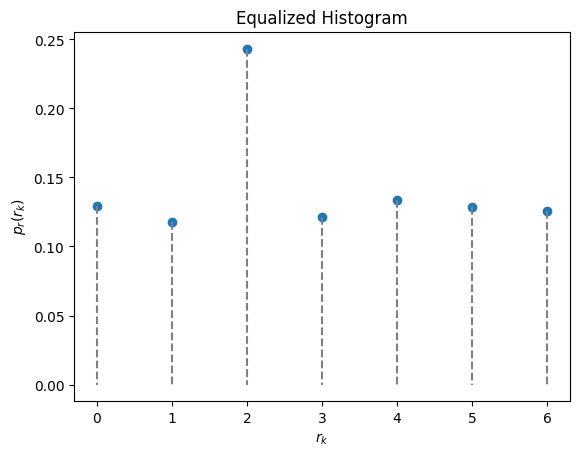

In [93]:
l = len(equalized_histogram.values())
plt.scatter(range(l), equalized_histogram.values())
[plt.plot([i, i], [list(equalized_histogram.values())[i], 0], '--', color='gray') for i in range(l)]
plt.ylabel("$p_r(r_k)$")
plt.xlabel("$r_k$")
plt.title("Equalized Histogram")
plt.show()

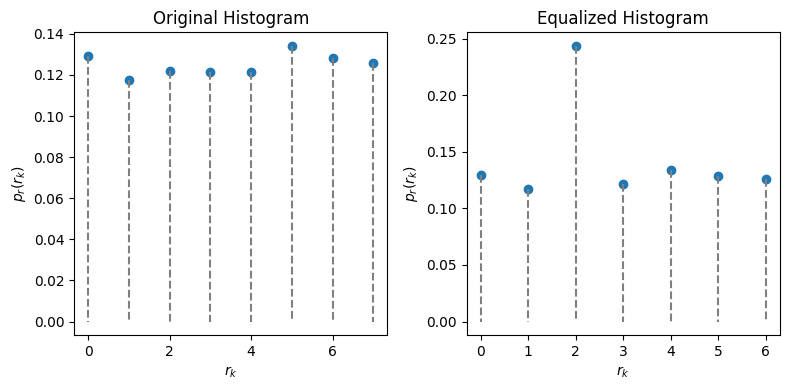

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(range(8), p_r_values.values())
[ax1.plot([i, i], [list(p_r_values.values())[i], 0], '--', color='gray') for i in range(8)]
ax1.set_ylabel("$p_r(r_k)$")
ax1.set_xlabel("$r_k$")
ax1.set_title("Original Histogram")

ax2.scatter(range(l), equalized_histogram.values())
[ax2.plot([i, i], [list(equalized_histogram.values())[i], 0], '--', color='gray') for i in range(l)]
ax2.set_ylabel("$p_r(r_k)$")
ax2.set_xlabel("$r_k$")
ax2.set_title("Equalized Histogram")

fig.tight_layout()
plt.show()

In [95]:
replacement_values = {i:v[i] for i in range(len(v))}
replacement_values

{0: 1, 1: 2, 2: 3, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}

In [96]:
# create an array with the replacement values using the dictionary
replace_img = np.array([[replacement_values.get(item, item) for item in row] for row in tqdm(image)])

# replace the values in the array using the replacement array
replace_img = np.where(replace_img != None, replace_img, image)

# print the updated array
print(replace_img)

100%|███████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 12746.22it/s]

[[7 3 3 ... 3 2 1]
 [4 6 1 ... 3 5 7]
 [1 3 5 ... 2 3 1]
 ...
 [3 1 4 ... 5 7 1]
 [6 5 6 ... 1 5 5]
 [3 3 1 ... 3 5 5]]


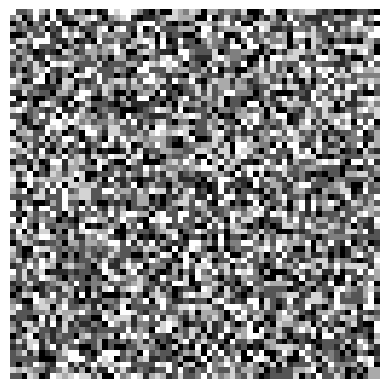

In [97]:
plt.imshow(replace_img, cmap=plt.cm.get_cmap('gray', 7))
plt.axis("off")
plt.show()

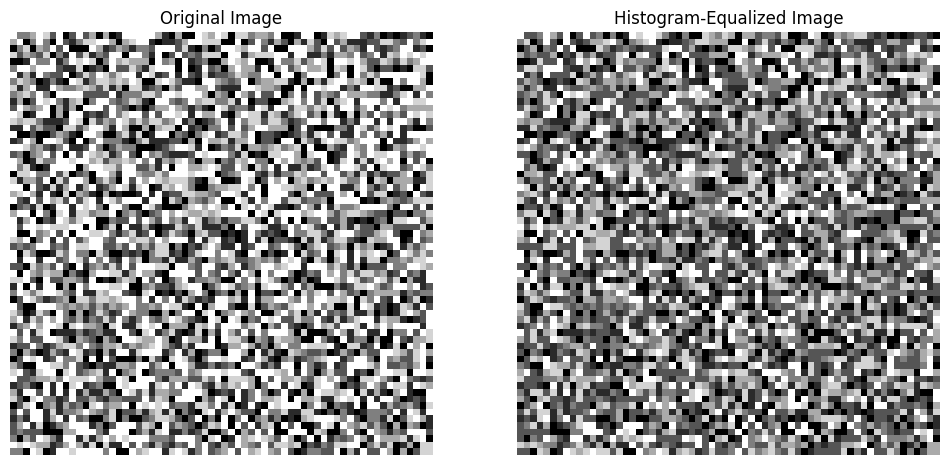

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.get_cmap('gray', 7))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(replace_img, cmap=plt.cm.get_cmap('gray', 7))
plt.title("Histogram-Equalized Image")
plt.axis("off")

plt.show()

In [99]:
from PIL import Image

# load the image
im = Image.open("roni.jpeg")

# convert the image to grayscale
im = im.convert('L')

# reshape the image
im = np.array(im)
im = im.reshape((im.shape[0] // 3, 3, im.shape[1] // 3, 3))
im = im.mean(axis=(1, 3)).astype(np.uint8)

# normalize the pixel values
im = im / 255.0

# quantize the pixel values
image = np.round(im * 7).astype(np.uint8)

image

array([[7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

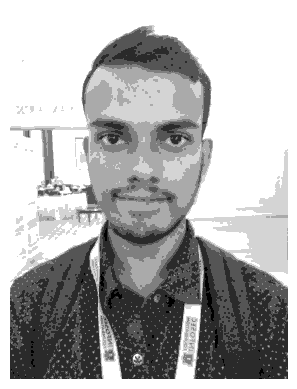

In [100]:
plt.imshow(image, cmap=plt.cm.get_cmap('gray', 7))
plt.axis("off")
plt.show()

In [101]:
def histogram_equalization(img: np.ndarray):
    values = get_values(img)
    p_r_values = {key:val/image.size for key, val in values.items()}
    v = []
    for j in values.keys():
        s = 0
        for i in range(int(j) + 1):
            s += p_r_values.get(i)
        v.append(s * (len(values.keys()) - 1))
    v = sorted([round(i) for i in v])
    
    # equalized_histogram = dict()
    # for i, j in zip(v, values.values()):
    #     equalized_histogram.setdefault(i, []).append(j)
    # equalized_histogram = {key:sum(val)/ image.size for key, val in equalized_histogram.items()}
    
    replacement_values = {i:v[i] for i in range(len(v))}
    
    replace_img = np.array([[replacement_values.get(item, item) for item in row] for row in tqdm(image)])

    replace_img = np.where(replace_img != None, replace_img, image)
    
    return replace_img

100%|██████████████████████████████████████████████████████████████████████████████| 1536/1536 [00:25<00:00, 59.94it/s]


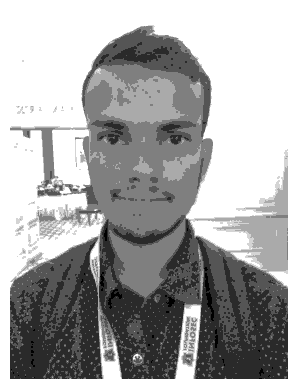

In [102]:
r_img = histogram_equalization(image)

plt.imshow(r_img, cmap=plt.cm.get_cmap('gray', 7))
plt.axis("off")
plt.show()

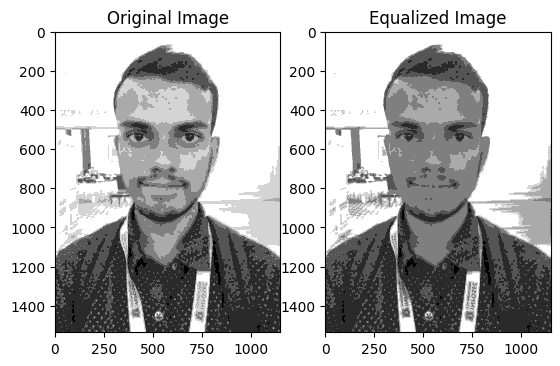

In [115]:
# display the original and equalized images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image, cmap=plt.cm.get_cmap('gray', 7))
ax1.set_title('Original Image')
ax2.imshow(r_img, cmap=plt.cm.get_cmap('gray', 7))
ax2.set_title('Equalized Image')
plt.show()

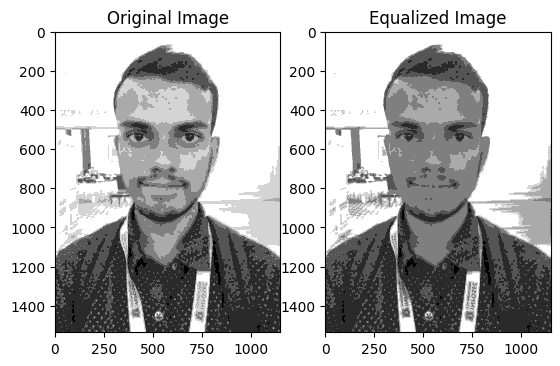

In [110]:
import cv2

# perform histogram equalization
equalized_img = cv2.equalizeHist(image)
equalized_img = equalized_img / 255.0
equalized_img = np.round(equalized_img * 7).astype(np.uint8)

# display the original and equalized images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image, cmap=plt.cm.get_cmap('gray', 7))
ax1.set_title('Original Image')
ax2.imshow(equalized_img, cmap=plt.cm.get_cmap('gray', 7))
ax2.set_title('Equalized Image')
plt.show()

In [114]:
np.array_equal(r_img, equalized_img)

True